In [1]:
import ctypes
from array import array

import numpy as np

import ROOT
from ROOT import (
    TF1,
    TH1F,
    TCanvas,
    TFormula,
    TPad,
    TPaveLabel,
    TPaveText,
    addressof,
    gBenchmark,
    kBlue,
)

%jsroot off

Welcome to JupyROOT 6.28/04


In [2]:
# 创建一个Tree文件tree1.root

# 创建文件、Tree以及一些分支
f = ROOT.TFile("tree1.root", "recreate")
t1 = ROOT.TTree("t1", "一个包含简单变量的简单Tree")
px, py, pz = ctypes.c_double(0), ctypes.c_double(0), ctypes.c_double(0)
random = ctypes.c_double(0)
ev = ctypes.c_int(0)
t1.Branch("px", px, "px/D") # 创建一个分支，名字为px，px/D代表px的数据类型是double。
t1.Branch("py", py, "py/D")
t1.Branch("pz", pz, "pz/D")
t1.Branch("random", random, "random/D")
t1.Branch("ev", ev, "ev/I")

# 填充Tree
for i in range(10000):
    ROOT.gRandom.Rannor(px, py)
    pz.value = px.value**2 + py.value**2
    random.value = ROOT.gRandom.Rndm()
    ev.value = i
    t1.Fill()

# 保存Tree头部。当函数作用域结束时，文件将自动关闭
t1.Write()

794

Warning in <TFile::Init>: file tree1.root probably not closed, trying to recover
Info in <TFile::Recover>: tree1.root, recovered key TTree:t1 at address 307892
Warning in <TFile::Init>: successfully recovered 1 keys


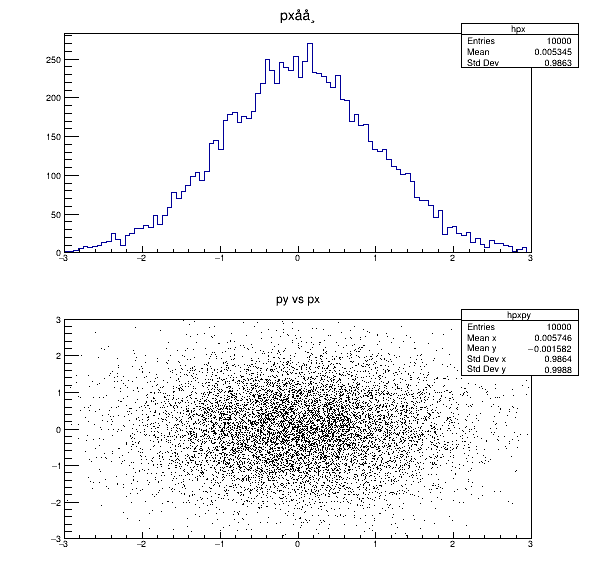

In [3]:
# 读取tree1w生成的Tree并创建两个直方图

# 导入ROOT库，用于处理ROOT文件和数据
import ctypes

import ROOT

# 打开名为 "tree1.root" 的ROOT文件
f = ROOT.TFile("tree1.root")

# 从文件中获取名为 "t1" 的TTree对象
t1 = f.Get("t1")

# 创建用于存储分支数据的变量
px, py, pz = ctypes.c_double(0), ctypes.c_double(0), ctypes.c_double(0)
random = ctypes.c_double(0)
ev = ctypes.c_int(0)

# 将变量与TTree中的对应分支关联
t1.SetBranchAddress("px", px)
t1.SetBranchAddress("py", py)
t1.SetBranchAddress("pz", pz)
t1.SetBranchAddress("random", random)
t1.SetBranchAddress("ev", ev)

# 创建两个直方图对象
hpx = ROOT.TH1F("hpx", "px分布", 100, -3, 3)
hpxpy = ROOT.TH2F("hpxpy", "py vs px", 30, -3, 3, 30, -3, 3)

# 读取TTree中的所有条目并将数据填充到直方图中
nentries = t1.GetEntries()
for i in range(nentries):
    t1.GetEntry(i)  # 读取指定的条目，并将相应的数据填充到事先定义好的变量中。
    hpx.Fill(px.value)
    hpxpy.Fill(px.value, py.value)

# 创建一个名为 "c1" 的画布，分成两行一列的两个部分
c1 = ROOT.TCanvas("c1", "c1", 600, 600)
c1.Divide(1, 2)

# 选择画布的第一个部分
c1.cd(1)

# 在第一个部分中绘制直方图 "hpx"
hpx.Draw()

# 选择画布的第二个部分
c1.cd(2)

# 在第二个部分中绘制直方图 "hpxpy"
hpxpy.Draw()

# 显示画布
c1.Draw()
t1.Delete()

In [4]:
## NOTE: comparing the results of this macro with those of staff.C, you'll
## notice that the resultant file is a couple of bytes smaller, because the
## code below strips all white-spaces, whereas the .C version does not.

import array
import os
import re

import ROOT
from ROOT import TFile, TTree, addressof, gROOT

# gROOT.ProcessLine定义了一个名为staff_t的C/C++结构体。
# 这个结构体表示将用于从ASCII文件中读取和存储数据的数据格式。
# 它包含了多个整数字段（Category、Flag、Age、Service、Children、Grade、Step、Hrweek、Cost）
# 以及两个字符数组字段（Division和Nation）。
gROOT.ProcessLine(
    "struct staff_t {\
   Int_t           Category;\
   UInt_t          Flag;\
   Int_t           Age;\
   Int_t           Service;\
   Int_t           Children;\
   Int_t           Grade;\
   Int_t           Step;\
   Int_t           Hrweek;\
   Int_t           Cost;\
   Char_t          Division[4];\
   Char_t          Nation[3];\
};"
)


## Function to read in data from ASCII file and fill the ROOT tree
def staff():
    # staff()函数用于读取ASCII文件中的数据并填充ROOT Tree
    staff = ROOT.staff_t()

    # The input file cern.dat is a copy of the CERN staff data base
    # from 1988

    f = TFile("staff.root", "RECREATE")

    tree = TTree("T", "staff data from ascii file")
    # 使用tree.Branch()方法定义了Tree的分支，分别包括整数类型的字段和字符数组类型的字段。

    # 这一行代码创建了一个名为'staff'的分支，它将用于存储员工数据。具体解释如下：
    # 'staff'：这是分支的名称，用于在Tree中标识这个分支。
    # staff：这是存储数据的对象，即前面定义的staff对象，该对象的数据将存储在这个分支中。
    # 'Category/I:Flag:Age:Service:Children:Grade:Step:Hrweek:Cost'：这是数据描述字符串，它定义了分支中每个数据成员的名称和类型。具体解释如下：
    # Category/I：表示一个整数（I）类型的数据成员，名称为'Category'。
    # Flag、Age、Service、Children、Grade、Step、Hrweek、Cost：表示每个数据成员的名称，它们将与staff对象中的相应字段关联。
    tree.Branch(
        "staff", staff, "Category/I:Flag:Age:Service:Children:Grade:Step:Hrweek:Cost"
    )

    # 这一行代码创建了一个名为'Divisions'的分支，它将用于存储员工的'Division'字段数据，这是一个字符数组。具体解释如下：
    # 'Divisions'：这是分支的名称，用于标识这个分支。
    # addressof( staff, 'Division' )：这是指向staff对象中'Division'字段的指针，以便将字符数组的数据存储到这个分支中。
    # 'Division/C'：这是数据描述字符串，它指定了这个分支存储的数据是字符数组（C），分支名称为'Division'。
    tree.Branch("Divisions", addressof(staff, "Division"), "Division/C")

    tree.Branch("Nation", addressof(staff, "Nation"), "Nation/C")

    # print(str(ROOT.gROOT.GetTutorialDir())) # 获取根目录
    # note that the branches Division and Nation cannot be on the first branch
    fname = os.path.join(str(ROOT.gROOT.GetTutorialDir()), "tree", "cernstaff.dat")
    for line in open(fname).readlines():
        t = list(filter(lambda x: x, re.split("\s+", line)))
        staff.Category = int(t[0])  # assign as integers
        staff.Flag = int(t[1])
        staff.Age = int(t[2])
        staff.Service = int(t[3])
        staff.Children = int(t[4])
        staff.Grade = int(t[5])
        staff.Step = int(t[6])
        staff.Hrweek = int(t[7])
        staff.Cost = int(t[8])
        staff.Division = t[9]  # assign as strings
        staff.Nation = t[10]
        # print(t[9],t[10])
        # 将数据从内存中的对象（通常是一个结构体或类的实例）写入到 TTree 中的对应分支。
        tree.Fill()

    tree.Print()
    tree.Write()


#### run fill function if invoked on CLI
if __name__ == "__main__":
    staff()

******************************************************************************
*Tree    :T         : staff data from ascii file                             *
*Entries :     3354 : Total =          172140 bytes  File  Size =      48245 *
*        :          : Tree compression factor =   2.84                       *
******************************************************************************
*Br    0 :staff     : Category/I:Flag:Age:Service:Children:Grade:Step:Hrweek:*
*         | Cost                                                             *
*Entries :     3354 : Total  Size=     122254 bytes  File Size  =      29072 *
*Baskets :        3 : Basket Size=      32000 bytes  Compression=   3.30     *
*............................................................................*
*Br    1 :Divisions : Division/C                                             *
*Entries :     3354 : Total  Size=      25330 bytes  File Size  =       9839 *
*Baskets :        1 : Basket Size=      32000 bytes 

In [5]:
# 创建一个名为 "c2" 的画布。它的标题是 "The FillRandom example"，左上角坐标为 (200, 10)，宽度为 700，高度为 900。
# 同时，设置画布的填充颜色为18。
c2 = TCanvas("c2", "The FillRandom exmple", 200, 10, 700, 900)
c2.SetFillColor(18)

# TPad
# 第一个参数是子画布的名称。
# 第二个参数是子画布的标题。
# 第三到第六个参数是子画布的位置和大小，分别表示左下角的X坐标、左下角的Y坐标、右上角的X坐标、右上角的Y坐标。
# 最后一个参数是画布的背景颜色，这里设置为21。
# 然后通过 Draw() 方法将这两个子画布绘制到主画布 c2 上。
pad1 = TPad("pad1", "The pad with the function", 0.05, 0.50, 0.95, 0.95, 21)
pad2 = TPad("pad2", "The pad with the histogram", 0.05, 0.05, 0.95, 0.45, 21)
pad1.Draw()
pad2.Draw()

gBenchmark.Start("fillrandom")

# cd 为将画布切到对应子画布下面。
pad1.cd()
pad1.SetGridx()
pad1.SetGridy()
pad1.GetFrame().SetFillColor(42)
pad1.GetFrame().SetBorderMode(-1)
pad1.GetFrame().SetBorderSize(5)

# 下面是定义一个 formula
form1 = TFormula("form1", "abs(sin(x)/x)")
sqroot = TF1("sqroot", "x*gaus(0)+[3]*form1", 0, 10)  # 0,10代表定义区间
sqroot.SetParameters(10, 4, 1, 20)
sqroot.SetLineColor(4)
sqroot.SetLineWidth(6)
sqroot.Draw()

# 5, 39是左下角坐标； 9.8, 46是右上角坐标
lfunction = TPaveLabel(5, 39, 9.8, 46, "The sqroot function")
lfunction.SetFillColor(41)
lfunction.Draw()

c2.Update()

pad2.cd()
pad2.GetFrame().SetFillColor(42)
pad2.GetFrame().SetBorderMode(-1)
pad2.GetFrame().SetBorderSize(5)

# 200代表把0-10划分多少个小区间 (0,10)代表区间
h1f = TH1F("h1f", "Test random numbers", 200, 0, 10)
h1f.SetFillColor(45)
# 向 sqroot 数据中传入随机数据
h1f.FillRandom("sqroot", 10000)
# 拟合
# h1f.SetFillColor(45)
# h1f.Fit("sqroot")

# h1f.Draw()

# c2.Update()

# c2.Draw()

#
# Open a ROOT file and save the formula, function and histogram
#
myfile = TFile("py-fillrandom.root", "RECREATE")
form1.Write()
sqroot.Write()
h1f.Write()
myfile.Close()
gBenchmark.Show("fillrandom")

fillrandom: Real Time =   0.35 seconds Cpu Time =   0.24 seconds


TFile**		./py-fillrandom.root	
 TFile*		./py-fillrandom.root	
  KEY: TFormula	form1;1	abs(sin(x)/x)
  KEY: TF1	sqroot;1	x*gaus(0)+[3]*form1
  KEY: TH1F	h1f;1	Test random numbers
Formula based function:     sqroot 
               sqroot : x*gaus(0)+[3]*form1 Ndim= 1, Npar= 4, Number= 0 
 Formula expression: 
	x*[p0]*exp(-0.5*((x-[p1])/[p2])*((x-[p1])/[p2]))+[p3]*(abs(sin(x)/x)) 
Contained histogram
TH1.Print Name  = Func, Entries= 100, Total sum= 1514.36
 FCN=172.13 FROM MIGRAD    STATUS=CONVERGED     150 CALLS         151 TOTAL
                     EDM=5.15834e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.38484e+01   5.48221e-01   2.86464e-03  -5.08033e-04
   2  p1           4.01311e+00   1.63652e-02   8.60322e-05  -7.51054e-02
   3  p2           9.55277e-01   1.19748e-02   5.28490e-05  -5.46868e-02
   4  p3           6.50

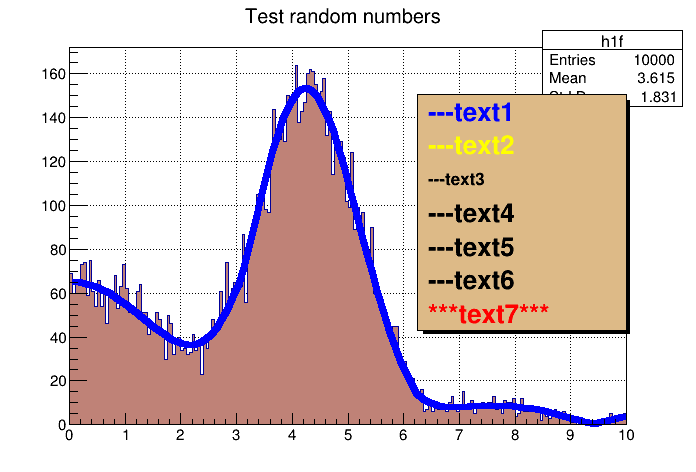

In [6]:
c3 = TCanvas("c3", "The Fit Canvas", 200, 10, 700, 500)
c3.SetGridx()
c3.SetGridy()
c3.GetFrame().SetFillColor(21)
c3.GetFrame().SetBorderMode(-1)
c3.GetFrame().SetBorderSize(5)

gBenchmark.Start("fit1")

FilePath = "./py-fillrandom.root"

if ROOT.gSystem.AccessPathName(FilePath):
    ROOT.Info(f"{FilePath} does not exist")
    exit()
fill = TFile(FilePath)

fill.ls()

sqroot = gROOT.FindObject("sqroot")
sqroot.Print()

# 现在用函数 sqroot 拟合直方图 h1f
h1f = gROOT.FindObject("h1f")
h1f.SetFillColor(45)
h1f.Fit("sqroot")

fitlabel = TPaveText(0.6, 0.3, 0.9, 0.80, "NDC")
fitlabel.SetTextAlign(12)
fitlabel.SetFillColor(42)
fitlabel.AddText("---text1").SetTextColor(kBlue)
fitlabel.AddText("---text2").SetTextColor(5)
fitlabel.AddText("---text3").SetTextSize(0.04)
fitlabel.AddText("---text4")
fitlabel.AddText("---text5")
fitlabel.AddText("---text6")
fitlabel.AddText("***text7***")
fitlabel.SetAllWith("**", "color", 2)
# fitlabel.ReadFile(path.join(str(gROOT.GetTutorialDir()), 'pyroot', 'fit1_py.py'))
fitlabel.Draw()
c3.Update()
c3.Draw()
gBenchmark.Show("fit1")